В этом блоке проанализируем А/Б тест

Мы добавили на лендинг с оформлением дебетовой карты (https://www.tinkoff.ru/cards/debit-cards/tinkoff-black/) информацию о дополнительных кэшбеках, которые появляются благодаря нашим патнерам. Рассчитываем, что это вырастит конверсию из переходов на лендинг в оформление дебетовой карты. 

В приложенном файле вам доступны логи переходов на сайт и последующего оформления карточки за каждый день. 

In [19]:
# загрузим необходимые пакеты

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
# Загрузите таблицу в датафрейм

df = pd.read_csv('hw_ab.csv')

In [56]:
# Посмотрите на поля и проанализируйте таблицу: она содержит поля 
# date — дата захода пользователя на лендинг
# id — идентификатор, присвоенный пользователю
# group — группа control или test
# converted – 1, если пользователь оформил карточку и 0, если не оформил
#df


In [8]:
# убедитесь,что пользователи уникальные
duplicate_names = df['id'].value_counts()
#duplicate_names
#df_unique = df.drop_duplicates(subset=['wage'])
#df_unique

In [14]:
# убедитесь, что пользователей в тесте и контрле приблизительно равное количество, 
# в каждой группе каждый день теста были пользователи, и они как оформляли карту, так и нет
group_count = df['group'].value_counts()
group_count
#Приблизительно равное

group
test       47448
control    47330
Name: count, dtype: int64

In [33]:
# отличаются ли конверсии в тесте и в контроле?
# Разделение данных на тестовую и контрольную группы
test_group = df[df['group'] == 'test']
control_group = df[df['group'] == 'control']

# Подсчет количества конверсий в каждой группе
converted_test = test_group['converted'].sum()
total_test = len(test_group)
print('Число конверсий в тестовой группе: ', converted_test)
converted_control = control_group['converted'].sum()
total_control = len(control_group)
print('Число конверсий в контрольной группе: ', converted_control, '\n')

# Проведение статистического теста (например, Z-тест)
z_stat, p_value = stats.ttest_ind(test_group['converted'], control_group['converted'])
print('Z: ', z_stat)
print('P: ', p_value,'\n')
# Вывод результатов
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print('Различие в конверсиях статистически значимо')
else:
    print('Различие в конверсиях не является статистически значимым')


Число конверсий в тестовой группе:  5674
Число конверсий в контрольной группе:  4922 

Z:  7.61786611978935
P:  2.602829304785682e-14 

Различие в конверсиях статистически значимо


In [41]:
# отношение конверсий: 
print((converted_test/total_test)/(converted_control/total_control)-1)

0.14991652616768292


In [ ]:
# значимо ли это отличие? 
# проверьте статистическим тестом

In [40]:
# сначала используем знание о том, что конверсии распределены биномиально: 
# используйте статистический тест и проинтерпретируйте результаты
# как меняется ваш результат в зависимости от принятого вами уровня значимости?
btest = stats.binomtest(k=converted_test, n=total_test, p=converted_control/total_control, alternative='two-sided')
alpha = 0.05
if btest.pvalue < alpha:
    print('Различие в конверсиях статистически значимо')
else:
    print('Различие в конверсиях не является статистически значимым')

Различие в конверсиях статистически значимо


In [49]:
# достаточно ли длинным был тест, чтобы мы могли посчитать средние конверсии и сравнить значимость их различия? 
# посчитайте количество дней теста, убедитесь, что среди них нет пропусков
df['date'] = pd.to_datetime(df['date'])
test_start_date = df['date'].min()
test_end_date = df['date'].max()
num_days = (test_end_date - test_start_date).days + 1  # Добавляем 1, чтобы включить последний день

# Проверим, нет ли пропущенных дней
num_unique_dates = len(df['date'].unique())

if num_days == num_unique_dates:
    print(f'Тест длился {num_days} дней, нет пропущенных дней')
else:
    print(f'Есть пропущенные дни в данных')

Тест длился 93 дней, нет пропущенных дней


In [54]:
# посчитайте количество открытых карт и средние конверсии по дням в тесте и в контроле:
# Подсчет количества открытых карт и средних конверсий по дням в тестовой группе
test_n_by_date = test_group.groupby('date').agg({'converted': ['count', 'mean']})
test_n_by_date.columns = ['total_opened_cards', 'mean_conversion']
#test_n_by_date

In [55]:
# Подсчет количества открытых карт и средних конверсий по дням в контрольной группе
control_n_by_date = control_group.groupby('date').agg({'converted': ['count', 'mean']})
control_n_by_date.columns = ['total_opened_cards', 'mean_conversion']
#control_n_by_date

In [57]:
# посчитайте конверсию из посещений в оформленние карт по дням
# Посчитаем конверсию из посещений в оформление карт по дням в тестовой группе
test_conv_by_date = test_group.groupby('date').agg({'converted': 'mean'})
test_conv_by_date.columns = ['conversion_rate']

In [58]:
# Посчитаем конверсию из посещений в оформление карт по дням в контрольной группе
control_conv_by_date = control_group.groupby('date').agg({'converted': 'mean'})
control_conv_by_date.columns = ['conversion_rate']

D:\Soft\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Soft\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Soft\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Soft\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


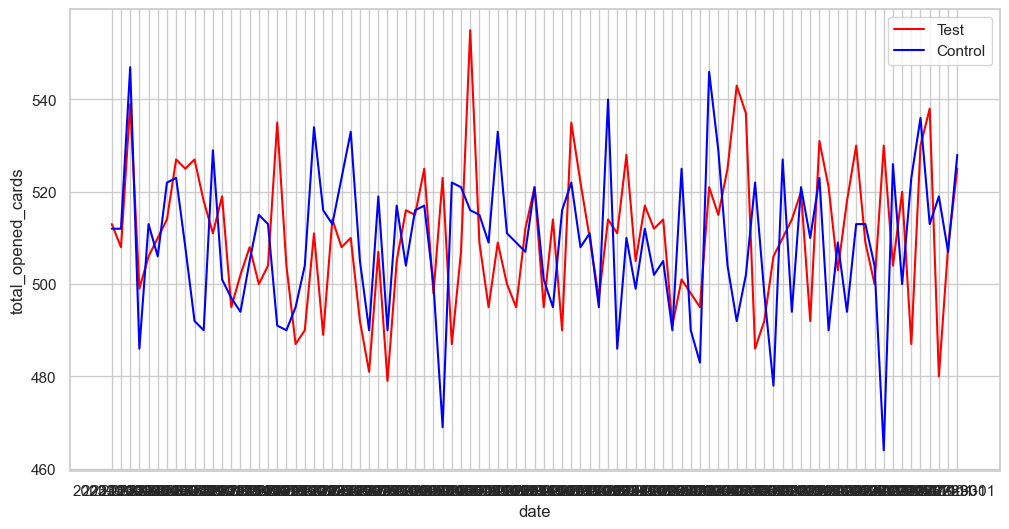

In [71]:
# построим график, отражающий количество оформленных карт по дням
import numpy as np

# Замена бесконечных значений на NaN
test_n_by_date.replace([np.inf, -np.inf], np.nan, inplace=True)
control_n_by_date.replace([np.inf, -np.inf], np.nan, inplace=True)

# Построение графика
plt.figure(figsize=(12, 6))
sns.lineplot(data=test_n_by_date['total_opened_cards'].dropna(), color="red", label="Test")
sns.lineplot(data=control_n_by_date['total_opened_cards'].dropna(), color="blue", label="Control")

# Отображение графика
plt.show()

D:\Soft\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Soft\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Soft\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Soft\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


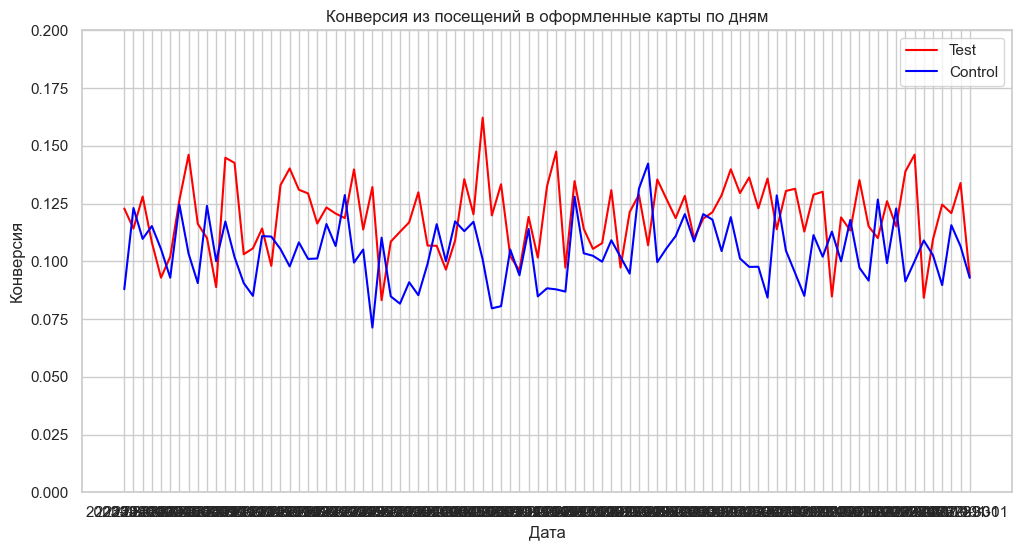

In [74]:
# построим график, отражающий конверсию из посещений в оформленние карт по дням
sns.set(style="whitegrid")

# Построение графика
plt.figure(figsize=(12, 6))
sns.lineplot(data=test_conv_by_date['conversion_rate'], color="red", label="Test")
sns.lineplot(data=control_conv_by_date['conversion_rate'], color="blue", label="Control")

# Установка заголовка и меток осей
plt.title('Конверсия из посещений в оформленные карты по дням')
plt.xlabel('Дата')
plt.ylabel('Конверсия')

# Ограничение оси y
plt.ylim(0, 0.2)

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()

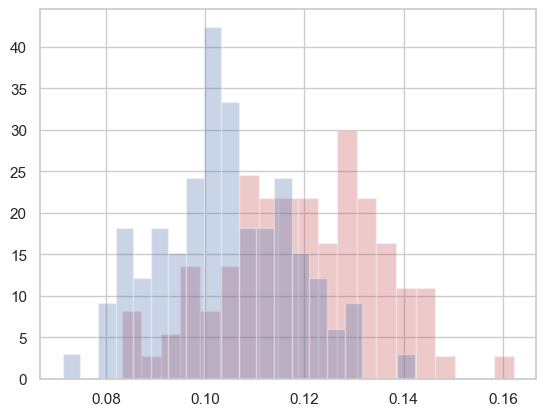

In [75]:
# построим распределения средних значений по дням в тесте и в контроле
# на что похоже это распределение?

plt.hist(test_conv_by_date, 20, density=True,color='r',alpha=0.3 )
plt.hist(control_conv_by_date, 20, density=True,color='b',alpha=0.3 )

plt.show()

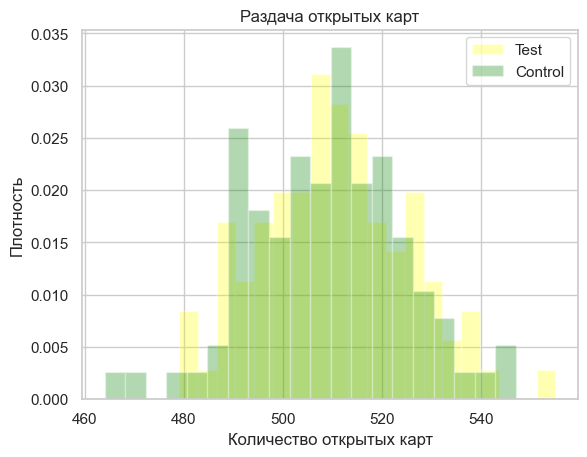

In [82]:
plt.hist(test_n_by_date['total_opened_cards'], bins=20, density=True, color='yellow', alpha=0.3, label='Test')
plt.hist(control_n_by_date['total_opened_cards'], bins=20, density=True, color='green', alpha=0.3, label='Control')

plt.xlabel('Количество открытых карт')
plt.ylabel('Плотность')
plt.title('Раздача открытых карт')
plt.legend()
plt.show()


In [93]:
# теперь используем знание о том, что средние конверсии распределены нормально
# используйте статистический тест и проинтерпретируйте результаты
# как меняется ваш результат в зависимости от принятого вами уровня значимости?
# Проведение t-теста для независимых выборок
t_stat, p_value = stats.ttest_ind(test_conv_by_date['conversion_rate'], control_conv_by_date['conversion_rate'])
print(p_value)
alpha = 0.05
if p_value < alpha:
    print('Различие в средних конверсиях статистически значимо')
else:
    print('Различие в средних конверсиях не является статистически значимым')



1.4124701519287306e-11
Различие в средних конверсиях статистически значимо


In [92]:
# используйте тот же статистический тест, чтобы оценить, отличаются ли  и проинтерпретируйте результаты
# как меняется ваш результат в зависимости от принятого вами уровня значимости?
t_stat, p_value = stats.ttest_ind(test_n_by_date['total_opened_cards'], control_n_by_date['total_opened_cards'])
print(p_value)
alpha = 0.05
if p_value < alpha:
    print('Различие в средних конверсиях статистически значимо')
else:
    print('Различие в средних конверсиях не является статистически значимым')


0.5774387614774723
Различие в средних конверсиях не является статистически значимым
